# $\phi^{4}$-theory in 2D

## Introduction

Having dealt with 0- and 1-dimensional scalar field theories, we now study the $\phi^{4}$-theory in 2 dimensions.

Although the computational techniques implemented before can be easily generalized to this case, this theory already allows the study of interesting physical phenomena such as **phase transitions**.

In 2-dimensional Euclidean space, the $\phi^{4}$-theory is described by the action
\begin{equation}
    S[\phi] = \int \mathrm{d}^{2}x \;  \left[ \frac{1}{2} \left( \partial_{\mu} \phi \right) \left( \partial^{\mu} \phi \right) + \frac{1}{2} m^{2} \phi^{2} + \frac{1}{4!} \lambda \phi^{4} \right],
\end{equation}
where $m^{2}$ and $\lambda$ are parameters of the theory, and
\begin{equation}
    \left( \partial_{\mu} \phi \right) \left( \partial^{\mu} \phi \right) = \left(\frac{\partial \phi}{\partial x_{1}}\right)^{2} + \left(\frac{\partial \phi}{\partial x_{2}}\right)^{2}.
\end{equation}
Since we assume periodic boundary conditions along each dimension, upon integrating by parts the action can be rewritten as
\begin{equation}
    S[\phi] = \int \mathrm{d}^{2}x \;  \left[ -\frac{1}{2} \phi \left( \partial_{\mu} \partial^{\mu} \phi \right) + \frac{1}{2} m^{2} \phi^{2} + \frac{1}{4!} \lambda \phi^{4} \right].
\end{equation}

An interesting feature of this theory is its behavior for different values of the parameters $m^{2}$ and $\lambda$.

The potential term in the action is
\begin{equation}
    V(\phi) = \frac{1}{2} m^{2} \phi^{2} + \frac{1}{4!} \lambda \phi^{4}
\end{equation}
and it will be bounded from below as long as $\lambda > 0$, which we require to define a distribution. \
Besides the restriction on $\lambda$, if we allow $m^{2}$ to take negative values there are two qualitatively different potentials:
1. If $m^{2} \geq 0$, the potential has a minimum at $\phi = 0$, which also corresponds to a minimum of the action.
2. If $m^{2} < 0$, $\phi = 0$ is instead a local maximum, and there are two global minima at $\phi = \pm \sqrt{-6 m^{2} / \lambda}$.

Thus, whereas for $m^{2} \geq 0$ there is a single vacuum $\phi = 0$ for which $\langle \phi \rangle = 0$, this is not the case for $m^{2} < 0$, where there are now two vacua and $\langle \phi \rangle = \pm \sqrt{-6 m^{2} / \lambda}$. \
Since the vacuum expectation value $\langle \phi \rangle = 0$ is invariant under $\phi \to -\phi$, but the two vacua $\langle \phi \rangle = \pm \sqrt{-6 m^{2} / \lambda}$ are not, this is a case of _spontaneous symmetry breaking_.

In these exercises, we will explore some aspects of this spontaneous symmetry breaking with methods from lattice field theory.

In order to discretize the theory, we set 2-dimensional spacetime on an equally-spaced lattice of $L^{2}$ sites with lattice spacing $a$, so spacetime points are now denoted by
\begin{equation}
    \vec{x} = a \vec{n} = a(n_{1}, n_{2}), \qquad 0 \leq n_{1}, n_{2} < L.
\end{equation}
Additionally, we approximate the integral in the action by a simple sum over all the nodes
\begin{equation}
    \int \mathrm{d}^{2} x \rightarrow a^{2} \sum_{\vec{n}},
\end{equation}
and the second derivative with a _five-point stencil_ discretization:
\begin{equation}
    \begin{aligned}
        \partial_{\mu}\partial^{\mu} \phi(\vec{x}) & = \left( \frac{\partial^{2}}{\partial x_{1}^{2}} + \frac{\partial^{2}}{\partial x_{2}^{2}} \right) \phi(\vec{x}) \\
         & \to \frac{\phi(n_{1} + 1, n_{2}) + \phi(n_{1} - 1, n_{2}) + \phi(n_{1}, n_{2} + 1) + \phi(n_{1}, n_{2} - 1) - 4 \phi(\vec{n})}{a^{2}} + \mathcal{O}(a^{2}) \\
         & = \sum_{\mu \in \{1, 2 \} } \frac{1}{a^{2}} \left[ \phi(\vec{n} + \hat{\mu}) + \phi(\vec{n} - \hat{\mu}) - 2 \phi(\vec{n}) \right] + \mathcal{O}(a^{2}).
    \end{aligned}
\end{equation}
All together, the discretized action reads
\begin{equation}
    S[\phi] = a^{2} \sum_{\vec{n}} \left( -\frac{1}{2 a^{2}} \phi(\vec{n}) \sum_{\mu} \left[ \phi(\vec{n} + \hat{\mu}) + \phi(\vec{n} - \hat{\mu}) - 2 \phi(\vec{n}) \right] + \frac{1}{2} m^{2} \phi^{2}(\vec{n}) + \frac{1}{4!} \lambda \phi^{4}(\vec{n}) \right)
\end{equation}
or, after some algebra,
\begin{equation}
    \boxed{S[\phi] = \sum_{\vec{n}} \left( \left[ 2 + \frac{1}{2} m^{2}\right] \phi^{2}(\vec{n}) + \frac{1}{4!} \lambda \phi^{4}(\vec{n}) -\sum_{\mu} \left[ \phi(\vec{n} + \hat{\mu}) \phi(\vec{n})\right] \right)}
\end{equation}
where we have redefined $(am)^{2} \to m^{2}$ and $(a^{2} \lambda) \to \lambda$.

## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Visualizing `np.roll`

Since we assume periodic boundary conditions, we can use NumPy's `np.roll` to compute the terms $\phi(\vec{n} + \hat{\mu}) \phi(\vec{n})$ in the action.

This function has 2 required parameters and 1 optional argument:
1. The array or array-like object,
2. the _shift_, i.e., the number of places by which all elements are shifted, and
3. optionally, an axis along which the shift is done.

With this, a product such as $\phi(\vec{n} + \hat{1}) \phi(\vec{n})$ for all lattice sites $\vec{n}$ can be computed simply as
```python
phi * np.roll(phi, shift=-1, axis=0)
```
as can be seen in the plot below.

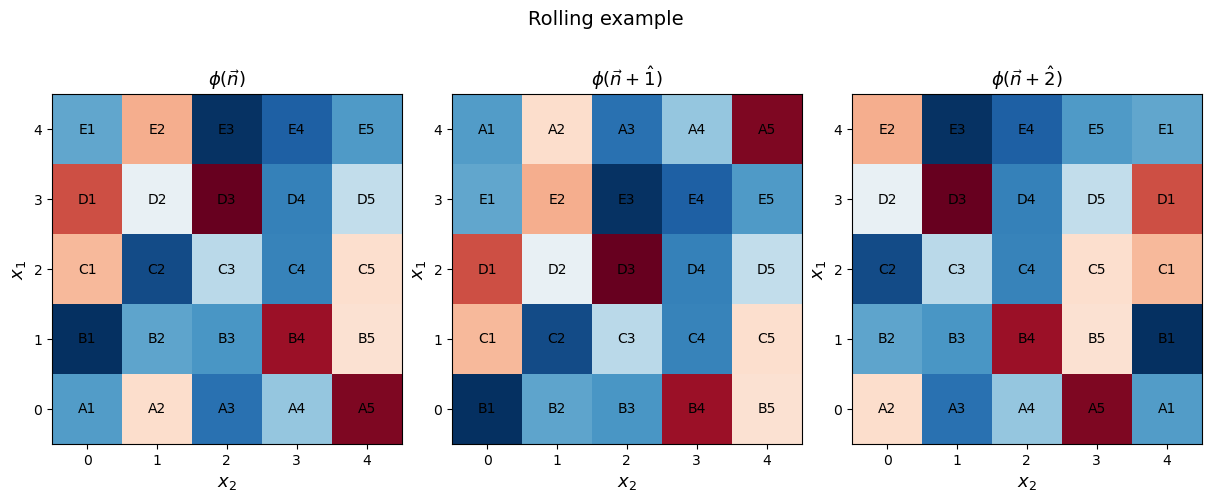

In [2]:
def roll_example():
    num_sites = 5  # Number of lattice sites along each dimension.
    rng = np.random.default_rng(seed=42)
    phi_field = rng.random(size=(num_sites, num_sites))

    roll_fig, roll_axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), constrained_layout=True)
    roll_fig.suptitle('Rolling example', fontsize=14)
    roll_axes[0].imshow(phi_field, origin='lower', cmap='RdBu')
    roll_axes[1].imshow(np.roll(phi_field, shift=-1, axis=0), origin='lower', cmap='RdBu')
    roll_axes[2].imshow(np.roll(phi_field, shift=-1, axis=1), origin='lower', cmap='RdBu')

    # Format the axes.
    roll_axes[0].set_title(r'$\phi(\vec{n})$', fontsize=13)
    roll_axes[0].set_xlabel(r"$x_{2}$", fontsize=13)
    roll_axes[0].set_ylabel(r"$x_{1}$", fontsize=13)
    roll_axes[1].set_title(r'$\phi(\vec{n} + \hat{1})$', fontsize=13)
    roll_axes[1].set_xlabel(r"$x_{2}$", fontsize=13)
    roll_axes[1].set_ylabel(r"$x_{1}$", fontsize=13)
    roll_axes[2].set_title(r'$\phi(\vec{n} + \hat{2})$', fontsize=13)
    roll_axes[2].set_xlabel(r"$x_{2}$", fontsize=13)
    roll_axes[2].set_ylabel(r"$x_{1}$", fontsize=13)

    # Annotate some points to stress the change.
    pts_text = [f"{letter}{num + 1}" for letter in ["A", "B", "C", "D", "E"] for num in range(num_sites)]
    for ax_idx in range(3):
        if ax_idx < 2:
            [roll_axes[ax_idx].annotate(pts_text[idx1 + idx2 * num_sites],
                              xy=(idx1, (idx2 - ax_idx) % num_sites), ha='center', va='center')
             for idx1 in range(num_sites) for idx2 in range(num_sites)]
        else:
            [roll_axes[ax_idx].annotate(pts_text[idx1 + idx2 * num_sites],
                              xy=((idx1 - 1) % num_sites, idx2), ha='center', va='center')
             for idx2 in range(num_sites) for idx1 in range(num_sites)]

    plt.show()

    return

roll_example()

### Code

In [3]:
def compute_action(phi: np.ndarray, mass2: float, lamb: float) -> np.ndarray:
    action = np.sum((2 + 0.5 * mass2) * (phi ** 2) + (lamb / 24) * (phi ** 4))
    for mu in range(2):
        action -= np.sum(phi * np.roll(phi, shift=-1, axis=mu))

    return action


def propose_phi(phi: np.ndarray,
                width: float,
                rng: np.random.Generator) -> np.ndarray:
    delta = 2. * rng.random(size=phi.shape) - 1.  # 2D array with random numbers between -1 and 1.
    return phi + width * delta


def metropolis_step(phi: np.ndarray,
                    mass2: float,
                    lamb: float,
                    width: float,
                    rng: np.random.Generator):
    # 1. Proposal
    proposed_phi = propose_phi(phi, width, rng)

    # 2. Acceptance probability.
    current_action = compute_action(phi, mass2=mass2, lamb=lamb)
    proposed_action = compute_action(proposed_phi, mass2=mass2, lamb=lamb)
    p_acceptance = np.min([1.0, np.exp(current_action - proposed_action)])

    # 3. Accept / reject
    r = rng.random()

    if r <= p_acceptance:  # Accept.
        return proposed_phi, 1

    # Reject.
    return phi, 0


def sample_field(initial_phi: np.ndarray,
                 num_samples: int,
                 mass2: float,
                 lamb: float,
                 width: float,
                 rng: np.random.Generator):
    chain = [initial_phi]
    acceptance = []

    for _ in range(num_samples):
        phi, accepted = metropolis_step(phi=chain[-1], mass2=mass2, lamb=lamb, width=width, rng=rng)
        chain.append(phi)
        acceptance.append(accepted)

    return chain, acceptance

## 1 Tuning

In a following exercise, we will study the mean value of an observable for different values of $L$. \
Therefore, we will need the widths $w$ such that each pair $(L, w)$ has the same acceptance rate.

By creating small chains (~2,000 samples) and using $m^{2} = -0.5$ and $\lambda = 5$, answer the following questions:

1. If the width is kept constant, what happens to the acceptance rate as $L$ is increased? \
    Try with values $5 \leq L \leq 10$.
2. If you want to have an approximately constant acceptance rate, how do you need to adjust the width?
3. Using your estimate from the previous point, find the widths that give an acceptance rate between 70% to 80% for each size $L$ used in point 1.

# Question 1: Change of acceptance rate with increasing L, constant width

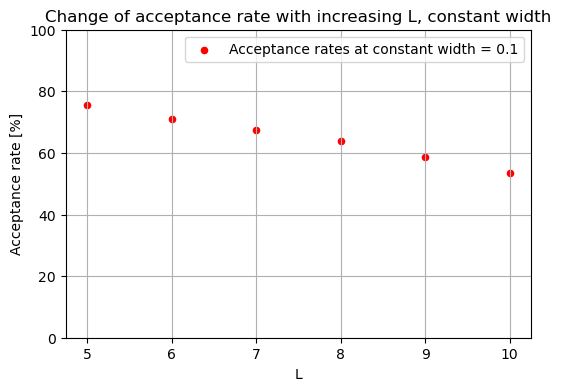

# Question 2: Constant acceptance rate by increasing L and decreasing width

Question 3: The widths are chosen such that the acceptance rate lies between 70 - 80%.

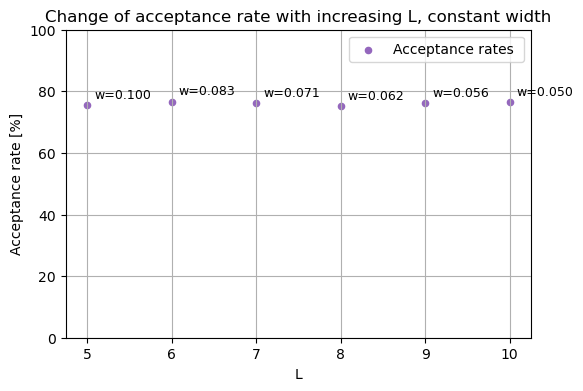

In [4]:
from IPython.display import display, Markdown

L_vals = list(range(5, 11))
m2 = -0.5
lam = 5.0
rng = np.random.default_rng(seed=42)

acceptance_rates = []
constant_acceptance_rates = []
adapted_widths = []
for L in L_vals:
    phi_field = rng.random(size=(L, L))
    width = 0.1
    adapted_width = 0.5/L
    adapted_widths.append(adapted_width)
    _, acceptance = sample_field(phi_field, 2000, m2, lam, width, rng)
    _, const_acceptance = sample_field(phi_field, 2000, m2, lam, adapted_width, rng)
    acceptance_rates.append(np.mean(acceptance)*100)
    constant_acceptance_rates.append(np.mean(const_acceptance)*100)

display(Markdown("# Question 1: Change of acceptance rate with increasing L, constant width"))
plt.figure(figsize = (6, 4))
plt.scatter(L_vals, acceptance_rates, c= "r", s = 20, label = f"Acceptance rates at constant width = {width}")
plt.title("Change of acceptance rate with increasing L, constant width")
plt.xlabel("L")
plt.ylabel("Acceptance rate [%]")
plt.legend()
plt.ylim(0, 100)
plt.grid(True)
plt.show()

display(Markdown("# Question 2: Constant acceptance rate by increasing L and decreasing width"))
display(Markdown("Question 3: The widths are chosen such that the acceptance rate lies between 70 - 80%."))
plt.figure(figsize = (6, 4))
plt.scatter(L_vals, constant_acceptance_rates, c= 'tab:purple', s = 20, label = f"Acceptance rates ")
plt.title("Change of acceptance rate with increasing L, constant width")
plt.xlabel("L")
plt.ylabel("Acceptance rate [%]")
plt.legend()
plt.ylim(0, 100)
plt.grid(True)
for L, acc, w in zip(L_vals, constant_acceptance_rates, adapted_widths):
    plt.annotate(f"w={w:.3f}", (L, acc), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=9, color='black')

plt.show()

## 2 Defining new functions

For these exercises, the observable of interest will be the absolute mean field, given by
\begin{equation}
    O[\phi] = \left| \frac{1}{L^{2}} \sum_{\vec{n}} \phi(\vec{n}) \right|.
\end{equation}
Since we will not be interested in using the samples for other observables, it is convenient to write a function that returns _only_ the measurements of the observable, in order to save memory.

**Task 1:** \
Write a new function `sample_observable` _that doesn't store the samples of the Markov chain_, but measures $O[\phi]$ after each Metropolis step and returns only these measurements (and the acceptances, if you want). \
You can do this by copying the structure of the function `sample_field` defined in the setup code and doing the appropriate modifications.

**Task 2:** \
Write a function that applies the binning method to a sample of measurements. \
This function should take as inputs (1) the measurements and (2) the minimum amount of measurements to take a bin into account (this can have a default value), and should output the bin sizes and the error for each bin. \
You can use code from previous notebooks to do this.

**Optional:** \
You can display a progress bar in your function of task 1 by
1. Installing the python package `tqdm`
2. Importing the package as `from tqdm.notebook import tqdm`
3. Rewriting the for loop in your function as `for _ in tqdm(range(num_samples)):`

In [5]:
from tqdm.notebook import tqdm
import numpy as np

#Task 1
def sample_observable(initial_phi: np.ndarray, num_samples: int, mass2: float, lamb: float, width: float, rng: np.random.Generator): 
    def mean_field_obs(phi: np.ndarray): 
        return np.abs(np.mean(phi))
    
    phi = initial_phi.copy()
    measurements = []
    acceptance = []

    for _ in range(num_samples): 
        phi, accepted = metropolis_step(phi, mass2=mass2, lamb=lamb, width=width, rng=rng)
        measurements.append(mean_field_obs(phi))
        acceptance.append(accepted)

    return measurements, acceptance

#Task 2
def bin_sizes_finder(sample_size: int): 
    max_search = int(np.sqrt(sample_size)) + 2
    bin_sizes = []
    for i in range(1, max_search):
        if sample_size % i == 0:
            bin_sizes.append(i)
            bin_sizes.append(sample_size // i)
    bin_sizes.sort()
    return bin_sizes

def apply_binning(measurements: np.ndarray, min_num_measurement_for_bin: int = 200):
    bin_sizes = bin_sizes_finder(len(measurements))

    binned_errors = []
    for i, size in enumerate(tqdm(bin_sizes, desc="Applying binning")):
        Markov_chain = len(measurements) // size
        if Markov_chain < min_num_measurement_for_bin: 
            bin_sizes = bin_sizes[:i]
            break
        binned_obs = measurements.reshape(Markov_chain, size)
        binned_obs = np.mean(binned_obs, axis = 1)
        binned_errors.append(np.std(binned_obs)/np.sqrt(Markov_chain))

    return bin_sizes, binned_errors  


## 3 Finite-volume effects

As mentioned in the introduction, we are interested in studying the spontaneous symmetry breaking of the theory, which is related to the vacuum expectation value of the field. \
However, instead of using the bare sample mean, it is more convenient to measure the absolute value of the mean:
\begin{equation}
    O[\phi] = \left| \frac{1}{L^{2}} \sum_{\vec{n}} \phi(\vec{n}) \right|.
\end{equation}
The reason for this will be explained in the following exercise.

Here, we will measure this observable for different lattice sizes in order to observe _finite-volume effects_, i.e., deviations from the expected value in the continuum due to the fact that we are dealing with a discretized version of the system.

### 3.1 Generate measurements

For each lattice size $5 \leq L \leq 10$, generate 110,880 measurements of $O[\phi]$ using $m^{2} = -0.5$, $\lambda = 5$, and the width values you found in exercise 1.

**Optional:**
* Once generated, you can write your data to a file to avoid having to repeat this process.
* Feel free to generate even more measurements, as long as it doesn't take you more than 5-6 min. to generate all the data.
    Suggested values for larger sample sizes are
    * 166,320
    * 277,200
    * 332,640
    * 554,400

In [6]:
import numpy as np
from tqdm import tqdm

L_vals = list(range(5, 11))
m2 = -0.5
lam = 5.0
rng = np.random.default_rng(seed=42)

L_data_dict = {}

for L in tqdm(L_vals, desc="Generating measurements"):
    initial_phi = rng.random(size=(L, L))
    width = 0.5 / L

    measurements, _ = sample_observable(
        initial_phi=initial_phi,
        num_samples=332_640,
        mass2=m2,
        lamb=lam,
        width=width,
        rng=rng
    )

    L_data_dict[f"L{L}"] = np.array(measurements, dtype=np.float32)

#https://numpy.org/doc/stable/reference/generated/numpy.savez.html
np.savez("observable_measurements_L5_to_L10.npz", **L_data_dict) #npz is compressed and efficient for structured data
print("Saved data to 'observable_measurements_L5_to_L10.npz'")

data = np.load("observable_measurements_L5_to_L10.npz")
measurements_L7 = data["L7"]
print(measurements_L7)


Generating measurements: 100%|██████████| 6/6 [03:07<00:00, 31.21s/it]

Saved data to 'observable_measurements_L5_to_L10.npz'
[0.50936556 0.50747263 0.5038006  ... 0.4963899  0.49541327 0.5089073 ]


### 3.2 Check for thermalization

Plot the measurements for each value of $L$ and check if they are thermalized.

If some or all of the chains do not look thermalized, do not worry anad go on to the next task.

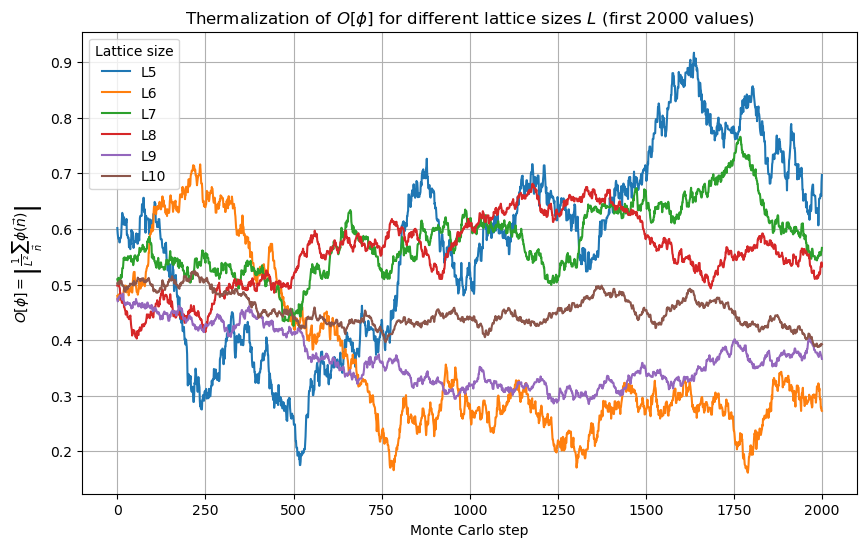

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("observable_measurements_L5_to_L10.npz")

plt.figure(figsize=(10, 6))

for key in sorted(data.keys(), key=lambda x: int(x[1:])):
    measurements = data[key]
    plt.plot(measurements[:2000], label=f"{key}")  #first 2000 values to check for thermalization
plt.title("Thermalization of $O[\\phi]$ for different lattice sizes $L$ (first 2000 values)")
plt.xlabel("Monte Carlo step")
plt.ylabel(r"$O[\phi] = \left| \frac{1}{L^2} \sum_{\vec{n}} \phi(\vec{n}) \right|$")
plt.legend(title="Lattice size")
plt.grid(True)
plt.show()


### 3.3 Binning method

Plot the results of the binning method for each value of $L$.

Can you see a plateau?
* If yes, what do the bin sizes at the plateau indicate?
* If not, can you explain why? Refer to both of your plots.

In either case, save the maximum error obtained for each $L$.

Applying binning:  66%|██████▌   | 127/192 [00:00<00:00, 3696.14it/s]


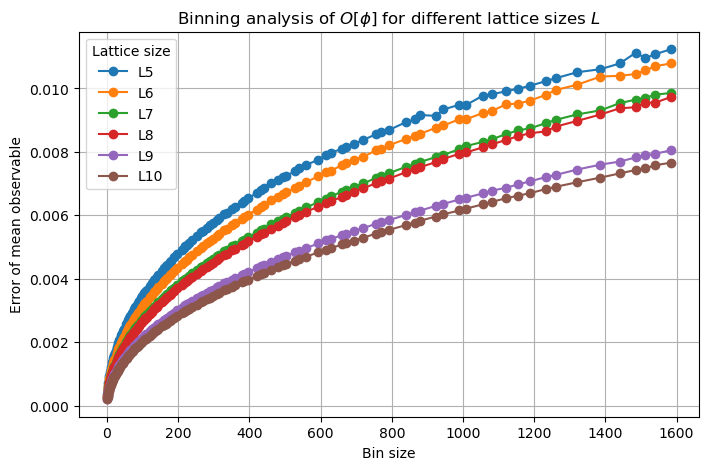

L5: max error = 0.01123
L6: max error = 0.01079
L7: max error = 0.00986
L8: max error = 0.00973
L9: max error = 0.00805
L10: max error = 0.00766


In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("observable_measurements_L5_to_L10.npz")

max_errors = {}

plt.figure(figsize=(8, 5))
for key in sorted(data.keys(), key=lambda x: int(x[1:])):
    measurements = data[key]
    bin_sizes, errors = apply_binning(np.array(measurements))

    max_errors[key] = np.max(errors)

    plt.plot(bin_sizes, errors, "o-", label=f"{key}")

plt.title("Binning analysis of $O[\\phi]$ for different lattice sizes $L$")
plt.xlabel("Bin size")
plt.ylabel("Error of mean observable")
plt.legend(title="Lattice size")
plt.grid(True)
plt.show()

for key, err in max_errors.items():
    print(f"{key}: max error = {err:.5f}")


I cannot see a plateau. Possible reasons:  
- The chains might be too short (unlikely). 
- Thermalization was not reached (but it was, see before). 

### 3.4 Mean values

Plot the sample means of $O[\phi]$ for each $L$ and their respective error.

What seems to be the limiting value for $L \to \infty$? \
Is this what you would expect from the description in the introduction?

Applying binning:  66%|██████▌   | 127/192 [00:00<00:00, 2768.49it/s]


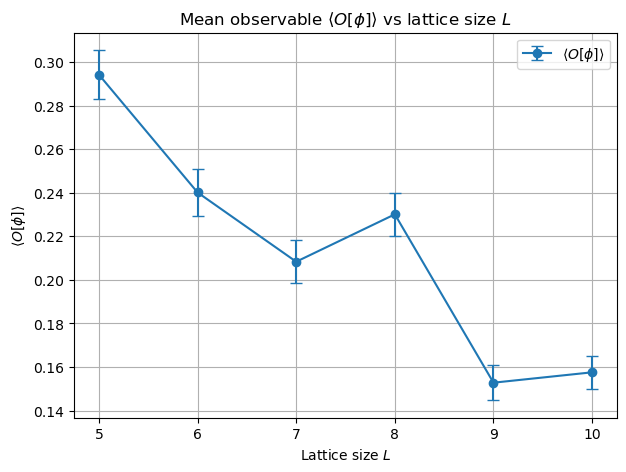

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("observable_measurements_L5_to_L10.npz")

L_vals = sorted([int(key[1:]) for key in data.keys()])
means = []
errors = []

for L in L_vals:
    key = f"L{L}"
    measurements = np.array(data[key])

    mean_val = np.mean(measurements)

    bin_sizes, binned_errors = apply_binning(measurements)
    err_val = np.max(binned_errors) 

    means.append(mean_val)
    errors.append(err_val)

plt.figure(figsize=(7, 5))
plt.errorbar(L_vals, means, yerr=errors, fmt='o-', capsize=4, label=r"$\langle O[\phi] \rangle$")
plt.title(r"Mean observable $\langle O[\phi] \rangle$ vs lattice size $L$")
plt.xlabel("Lattice size $L$")
plt.ylabel(r"$\langle O[\phi] \rangle$")
plt.grid(True)
plt.legend()
plt.show()


The mean value decreases with increasing L.  
$$ \lim_{L \rightarrow \infty} \braket{O[\phi]} \rightarrow 0 $$
This is not the expected limit for the 2D $\phi^4$ model with $m^2 < 0$, due to the symmetry $\phi \leftrightarrow -\phi$, there should be two equilibrium values!

## 4 Phase transition

In the previous exercise you (hopefully) found a result for the limit $L \to \infty$ that does not agree with the explanation given in the introduction. \
The reason for this is the following: \
For a classical system we expect $\langle \phi \rangle \neq 0$ when $m^{2} < 0$. \
In a quantum system, on the other hand, configurations that deviate from either vacua are allowed and these can restore the symmetry if the “energy barrier” for given $m^{2}$ and $\lambda$ is too small. \
In other words, in the quantum theory we can be in the symmetric phase, where $\langle \phi \rangle = 0$, _even for negative $m^{2}$_.

Therefore, in this exercise, we study at which point does the energy barrier become large enough that the fluctuations no longer restore the symmetry. \
This corresponds to a phase transition of the theory!

### 4.1 Generate measurements

Generate 110,880 samples for each of $m^{2} = 0, -0.5, -1, -1.5, -2, -2.5$. \
In all of these, set $\lambda = 5$, $L = 8$, and use the appropriate width from exercise 1.

**Optional:**
* Once generated, you can write your data to a file to avoid having to repeat this process.
* Feel free to generate even more measurements, as long as it doesn't take you more than 5-6 min. to generate all the data.
    Suggested values for larger sample sizes are
    * 166,320
    * 277,200
    * 332,640
    * 554,400

In [12]:
import numpy as np
from tqdm import tqdm

m2_vals = np.linspace(start=0, stop=-2.5, num=6)
lam = 5.0
L = 8
m2_data_dict = {}


for m2 in tqdm(m2_vals, "Generating measurements"): 
    initial_phi = rng.random(size=(L, L))
    width = 0.5 / L


    measurements, _ = sample_observable(
        initial_phi=initial_phi,
        num_samples=332_640,
        mass2=m2,
        lamb=lam,
        width=width,
        rng=rng
    )
    
    m2_data_dict[f"m2_{m2:.2f}"] = np.array(measurements, dtype=np.float32)

np.savez("observable_measurements_different_mass_squared.npz", **m2_data_dict)
print("Saved data to 'observable_measurements_different_mass_squared.npz'")

Generating measurements: 100%|██████████| 6/6 [03:07<00:00, 31.27s/it]

Saved data to 'observable_measurements_different_mass_squared.npz'


### 4.2 Check for thermalization

Plot the measurements for each value of $m^{2}$ and check if they are thermalized.

1. Do you notice a difference in the behavior of the chains for different $m^{2}$?
2. At which value does each chains thermalize to?

If some or all of the chains do not look thermalized, do not worry and go on to the next task.

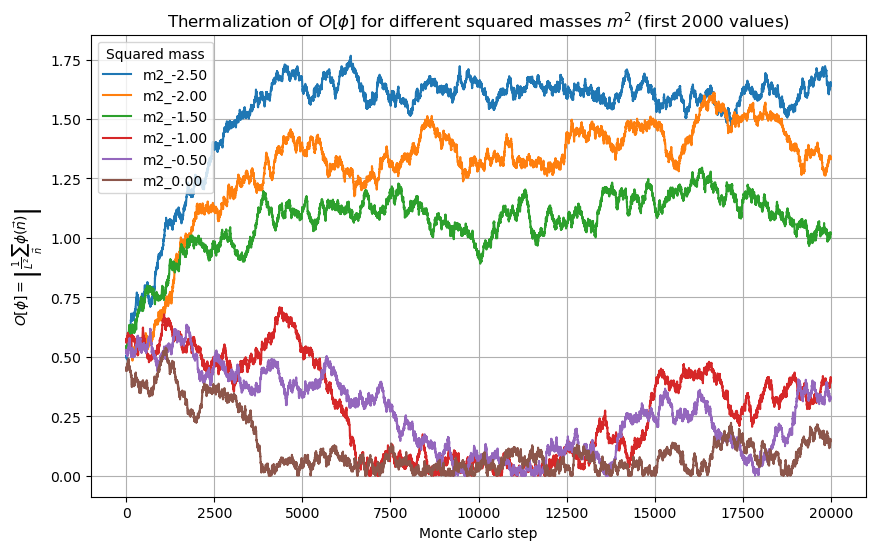

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("observable_measurements_different_mass_squared.npz")

plt.figure(figsize=(10, 6))

for key in sorted(data.keys(), key=lambda x: float(x.split('_')[1])):
    measurements = data[key]
    plt.plot(measurements[:20000], label=f"{key}")  #first 20000 values to check for thermalization
plt.title("Thermalization of $O[\\phi]$ for different squared masses $m^2$ (first 20'000 values)")
plt.xlabel("Monte Carlo step")
plt.ylabel(r"$O[\phi] = \left| \frac{1}{L^2} \sum_{\vec{n}} \phi(\vec{n}) \right|$")
plt.legend(title="Squared mass")
plt.grid(True)
plt.show()


### 4.3 Binning method

Plot the results of the binning method for each value of $m^{2}$.

1. Which value(s) of $m^{2}$ lead to the largest errors?
2. Can you see a plateau?
    * If yes, what do the bin sizes at the plateau indicate?
    * If not, can you explain why?

In either case, save the maximum error obtained for each $m^{2}$.

Applying binning:  66%|██████▌   | 127/192 [00:00<00:00, 1271.25it/s]


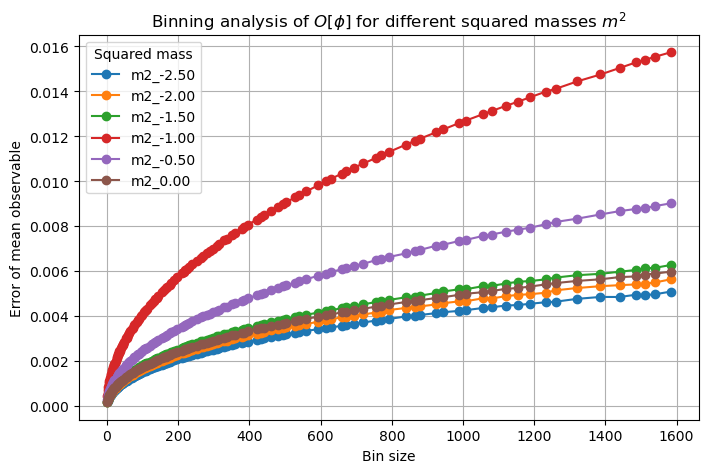

m2_-2.50: max error = 0.00508
m2_-2.00: max error = 0.00563
m2_-1.50: max error = 0.00626
m2_-1.00: max error = 0.01574
m2_-0.50: max error = 0.00901
m2_0.00: max error = 0.00597


In [18]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("observable_measurements_different_mass_squared.npz")

max_errors = {}

plt.figure(figsize=(8, 5))
for key in sorted(data.keys(), key=lambda x: float(x.split('_')[1])):
    measurements = data[key]
    bin_sizes, errors = apply_binning(np.array(measurements))

    max_errors[key] = np.max(errors)

    plt.plot(bin_sizes, errors, "o-", label=f"{key}")

plt.title("Binning analysis of $O[\\phi]$ for different squared masses $m^2$")
plt.xlabel("Bin size")
plt.ylabel("Error of mean observable")
plt.legend(title="Squared mass")
plt.grid(True)
plt.show()

for key, err in max_errors.items():
    print(f"{key}: max error = {err:.5f}")


### 4.4 Mean values

Finally, plot the sample means of $O[\phi]$ for each $m^{2}$ and their respective error.

In which range of values of $m^{2}$ does the phase transition starts to appear?

Applying binning:  66%|██████▌   | 127/192 [00:00<00:00, 4149.67it/s]


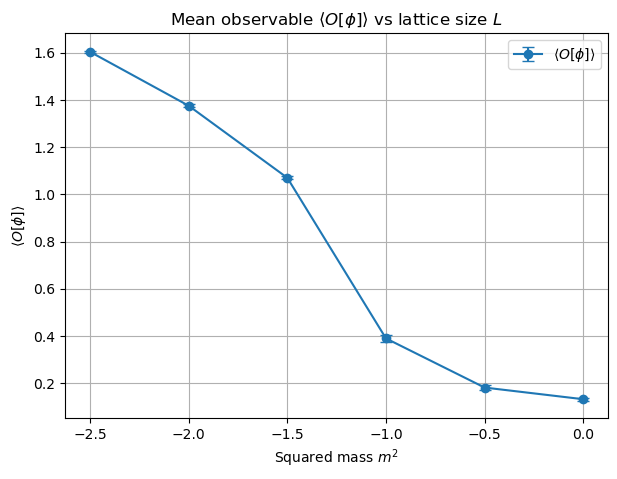

In [23]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("observable_measurements_different_mass_squared.npz")

m2_vals = sorted([float(key.split('_')[1]) for key in data.keys()])
means = []
errors = []

for m2 in m2_vals:
    key = f"m2_{m2:.2f}"

    measurements = np.array(data[key])

    mean_val = np.mean(measurements)

    bin_sizes, binned_errors = apply_binning(measurements)
    err_val = np.max(binned_errors) 

    means.append(mean_val)
    errors.append(err_val)

plt.figure(figsize=(7, 5))
plt.errorbar(m2_vals, means, yerr=errors, fmt='o-', capsize=4, label=r"$\langle O[\phi] \rangle$")
plt.title(r"Mean observable $\langle O[\phi] \rangle$ vs lattice size $L$")
plt.xlabel("Squared mass $m^2$")
plt.ylabel(r"$\langle O[\phi] \rangle$")
plt.grid(True)
plt.legend()
plt.show()


## Epilogue

As you have hopefully learned from these exercises, certain methods in lattice field theory can lead to chains with very long autocorrelation times. \
This is particularly problematic close to a phase transition of the theory, which is nevertheless an interesting physical scenario. \
Because of this, developing methods that counteract this phenomenon, known as _critical slowing down_, is an active area of research in the field.